# Example channel clustering simulation

The following code uses the Thomas clustering method. It will randomly place  a number of points pulled from a Poisson distribution with mean = lparent subdiscs on a disc of radius r. It will then pull from a second Poisson distribution with meaan = ldaughter which controls the cluster size and place those points on the subdisc with radius sigma. After positioning the channels the number of channels in a patch is simulated by creating n_centroids number of discs with radius r_sub randomly placed on the larger disc and counting the numer of channels in each. A channel is considered part of the patch if the point is within a distance r_sub from the patch center. The simulations are normalized such that the total number of channels present in the larger disc area vary about the same mean.

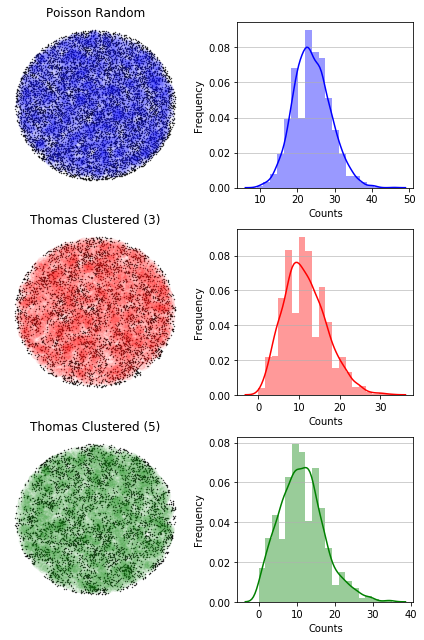

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

r = 1
x0 = 0
y0 = 0
area_tot = np.pi*r**2

l0 = 3000  # mean density of the poisson point process

np.random.seed(52)

npoints = np.random.poisson(l0 * area_tot)
thetas = 2*np.pi*np.random.uniform(0, 1, npoints)
rhos = r*np.sqrt(np.random.uniform(0, 1, npoints))

# Convert to cartesian coords
x = rhos * np.cos(thetas)
y = rhos * np.sin(thetas)

coords = np.array((x, y)).T

fig, axs = plt.subplots(3, 2, figsize=(6, 9))
axs[0, 0].scatter(x, y, marker='.', color='black', s=0.5)
axs[0, 0].axis('off')
axs[0, 0].set_title('Poisson Random')

r_sub = 0.05
n_centroids = 3000
num_inscribed = np.zeros(n_centroids)


theta_subs = 2*np.pi*np.random.uniform(0, 1, n_centroids)
rho_subs = (r-r_sub)*np.sqrt(np.random.uniform(0, 1, n_centroids))

x_subs = rho_subs * np.cos(theta_subs)
y_subs = rho_subs * np.sin(theta_subs)
sub_coords = np.array(([x_subs, y_subs])).T

dist = distance.cdist(coords, sub_coords, 'euclidean')
for i in sub_coords:
    circle = plt.Circle((i[0], i[1]), r_sub, color='blue', alpha=0.05)
    axs[0, 0].add_artist(circle)

for i in range(n_centroids):
    num_inscribed[i] = np.shape(np.where(dist[:, i] <= r_sub))[1]

sns.distplot(num_inscribed, color="b", ax=axs[0, 1], bins=20)

axs[0, 1].grid(axis='y', alpha=0.75)
axs[0, 1].set_xlabel('Counts')
axs[0, 1].set_ylabel('Frequency')

# Thomas Cluster
lDaughter = 3
lParent = l0/lDaughter
sigma = 0.05

rExt = r+6*sigma
area_ext = np.pi * 2 * rExt
npoints_parent = np.random.poisson(area_ext * lParent)

# Cluster parents
theta_par = 2*np.pi*np.random.uniform(0, 1, npoints_parent)
rho_par = (r+rExt)*np.sqrt(np.random.uniform(0, 1, npoints_parent))
x_par = rho_par * np.cos(theta_par)
y_par = rho_par * np.sin(theta_par)

# Cluster daughters
npoints_daughter = np.random.poisson(lDaughter, npoints_parent)
npoints_tot = sum(npoints_daughter)

theta_daughter = 2*np.pi*np.random.uniform(0, 1, npoints_tot)
rho_daughter = sigma*np.sqrt(np.random.uniform(0, 1, npoints_tot))
x_daught = rho_daughter * np.cos(theta_daughter)
y_daught = rho_daughter * np.sin(theta_daughter)

x_centers = np.repeat(x_par, npoints_daughter)
y_centers = np.repeat(y_par, npoints_daughter)

x_adj = x_centers + x_daught
y_adj = y_centers + y_daught
rho_adj = np.sqrt(x_adj**2 + y_adj**2)
x_adj = x_adj[np.where(rho_adj <= r)]
y_adj = y_adj[np.where(rho_adj <= r)]
clust_coords = np.array((x_adj, y_adj)).T

axs[1, 0].scatter(x_adj, y_adj, marker='.', color='black', s=0.5)
axs[1, 0].axis('off')
axs[1, 0].set_title('Thomas Clustered (3)')

r_sub = 0.05
n_centroids = 3000
num_inscribed2 = np.zeros(n_centroids)

theta_subs = 2*np.pi*np.random.uniform(0, 1, n_centroids)
rho_subs = (r-r_sub)*np.sqrt(np.random.uniform(0, 1, n_centroids))

x_subs = rho_subs * np.cos(theta_subs)
y_subs = rho_subs * np.sin(theta_subs)
sub_coords = np.array(([x_subs, y_subs])).T

dist = distance.cdist(clust_coords, sub_coords, 'euclidean')
for i in sub_coords:
    circle = plt.Circle((i[0], i[1]), r_sub, color='r', alpha=0.05)
    axs[1, 0].add_artist(circle)

for i in range(n_centroids):
    num_inscribed2[i] = np.shape(np.where(dist[:, i] <= r_sub))[1]

sns.distplot(num_inscribed2, color="r", ax=axs[1, 1], bins=20)

axs[1, 1].grid(axis='y', alpha=0.75)
axs[1, 1].set_xlabel('Counts')
axs[1, 1].set_ylabel('Frequency')

# Thomas Cluster

lDaughter = 5
lParent = l0/lDaughter
sigma = 0.05

rExt = r+6*sigma
area_ext = np.pi * 2 * rExt
npoints_parent = np.random.poisson(area_ext * lParent)

# Cluster parents
theta_par = 2*np.pi*np.random.uniform(0, 1, npoints_parent)
rho_par = (r+rExt)*np.sqrt(np.random.uniform(0, 1, npoints_parent))
x_par = rho_par * np.cos(theta_par)
y_par = rho_par * np.sin(theta_par)

# Cluster daughters
npoints_daughter = np.random.poisson(lDaughter, npoints_parent)
npoints_tot = sum(npoints_daughter)

theta_daughter = 2*np.pi*np.random.uniform(0, 1, npoints_tot)
rho_daughter = sigma*np.sqrt(np.random.uniform(0, 1, npoints_tot))
x_daught = rho_daughter * np.cos(theta_daughter)
y_daught = rho_daughter * np.sin(theta_daughter)

x_centers = np.repeat(x_par, npoints_daughter)
y_centers = np.repeat(y_par, npoints_daughter)

x_adj = x_centers + x_daught
y_adj = y_centers + y_daught
rho_adj = np.sqrt(x_adj**2 + y_adj**2)
x_adj = x_adj[np.where(rho_adj <= r)]
y_adj = y_adj[np.where(rho_adj <= r)]
clust_coords = np.array((x_adj, y_adj)).T

axs[2, 0].scatter(x_adj, y_adj, marker='.', color='black', s=0.5)
axs[2, 0].axis('off')
axs[2, 0].set_title('Thomas Clustered (5)')

r_sub = 0.05
n_centroids = 3000
num_inscribed2 = np.zeros(n_centroids)

theta_subs = 2*np.pi*np.random.uniform(0, 1, n_centroids)
rho_subs = (r-r_sub)*np.sqrt(np.random.uniform(0, 1, n_centroids))

x_subs = rho_subs * np.cos(theta_subs)
y_subs = rho_subs * np.sin(theta_subs)
sub_coords = np.array(([x_subs, y_subs])).T

dist = distance.cdist(clust_coords, sub_coords, 'euclidean')
for i in sub_coords:
    circle = plt.Circle((i[0], i[1]), r_sub, color='g', alpha=0.05)
    axs[2, 0].add_artist(circle)

for i in range(n_centroids):
    num_inscribed2[i] = np.shape(np.where(dist[:, i] <= r_sub))[1]

sns.distplot(num_inscribed2, color="g", ax=axs[2, 1], bins=20)

axs[2, 1].grid(axis='y', alpha=0.75)
axs[2, 1].set_xlabel('Counts')
axs[2, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

